## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

## Import google stock data

In [2]:
df = pd.read_csv('../resources/google-train.csv',parse_dates=['Date'])
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
...,...,...,...,...,...,...
2018-12-21,1015.299988,1024.020020,973.690002,979.539978,979.539978,4596000
2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300


In [3]:
df=df['Open'].resample('W').mean()
df

Date
2010-01-10     306.988330
2010-01-17     294.480212
2010-01-24     288.309349
2010-01-31     269.869458
2010-02-07     265.368335
                 ...     
2018-12-02    1058.651978
2018-12-09    1080.132507
2018-12-16    1055.517993
2018-12-23    1026.203992
2018-12-30    1007.420013
Freq: W-SUN, Name: Open, Length: 469, dtype: float64

In [4]:
### Take only 2014-2018
df = df['2015-01-01':]

## Check for stationarity

In [5]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
#adf_test(np.sqrt(np.log(df)))
adf_test(df)

Results of Dickey-Fuller Test:
Test Statistic                  -1.487370
p-value                          0.539750
#Lags Used                       2.000000
Number of Observations Used    206.000000
Critical Value (1%)             -3.462499
Critical Value (5%)             -2.875675
Critical Value (10%)            -2.574304
dtype: float64


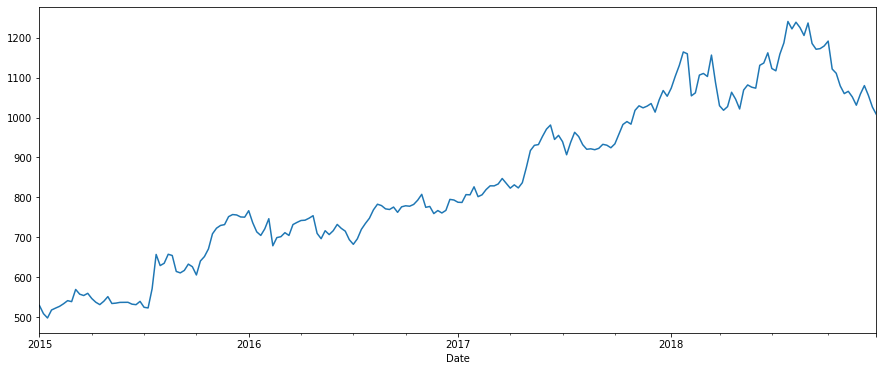

In [6]:
df.plot(figsize=(15, 6))
plt.show()

In [7]:
df

Date
2015-01-04     528.683502
2015-01-11     508.206732
2015-01-18     497.436291
2015-01-25     517.409439
2015-02-01     522.194312
                 ...     
2018-12-02    1058.651978
2018-12-09    1080.132507
2018-12-16    1055.517993
2018-12-23    1026.203992
2018-12-30    1007.420013
Freq: W-SUN, Name: Open, Length: 209, dtype: float64

In [8]:
# Take Log
df_logged = np.log(df)

# Take SQRT
df_sqrt = np.sqrt(df)

# Take difference
df_diff_one = np.diff(df)

In [9]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
adf_test(df_sqrt)

Results of Dickey-Fuller Test:
Test Statistic                  -1.663855
p-value                          0.449825
#Lags Used                       2.000000
Number of Observations Used    206.000000
Critical Value (1%)             -3.462499
Critical Value (5%)             -2.875675
Critical Value (10%)            -2.574304
dtype: float64


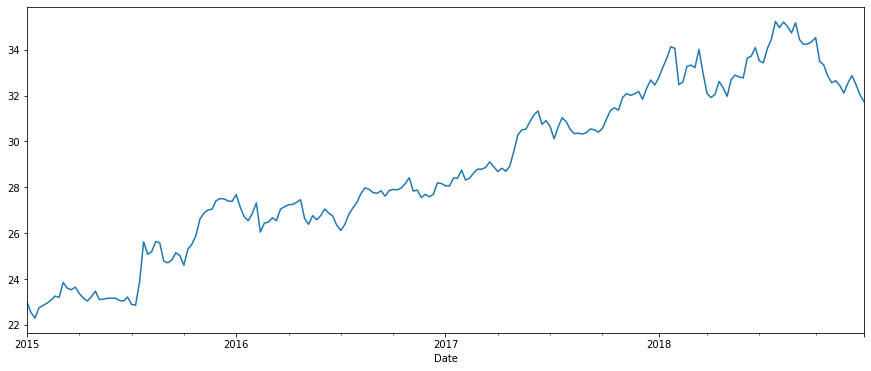

In [10]:
df_sqrt.plot(figsize=(15, 6))
plt.show()

In [11]:
#get movingAvg
movingAvg = df_sqrt.rolling(window=12).mean()
movingSTD = df_sqrt.rolling(window=12).std()

In [12]:
transformed_df = (df_sqrt - movingAvg).dropna()

In [13]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
#adf_test(np.sqrt(np.log(df)))
adf_test(transformed_df)

Results of Dickey-Fuller Test:
Test Statistic                  -4.326451
p-value                          0.000400
#Lags Used                       1.000000
Number of Observations Used    196.000000
Critical Value (1%)             -3.464161
Critical Value (5%)             -2.876402
Critical Value (10%)            -2.574692
dtype: float64


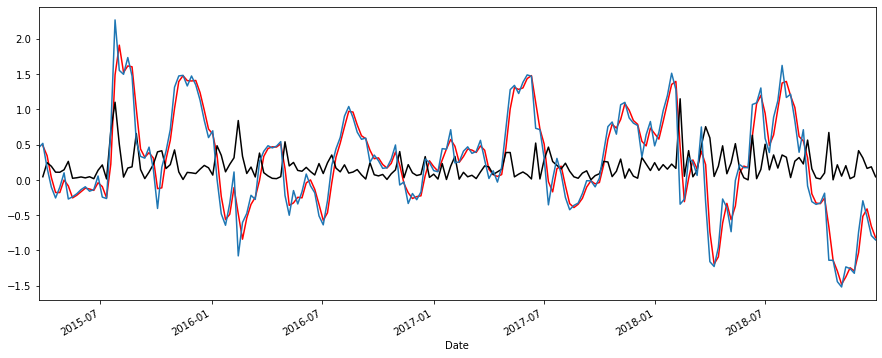

In [14]:
movingAvg = transformed_df.rolling(window =2).mean()
movingSTD = transformed_df.rolling(window =2).std()
plt.plot(movingAvg, color = 'red')
plt.plot(movingSTD, color = 'black')
transformed_df.plot(figsize=(15, 6))

In [15]:
df = transformed_df

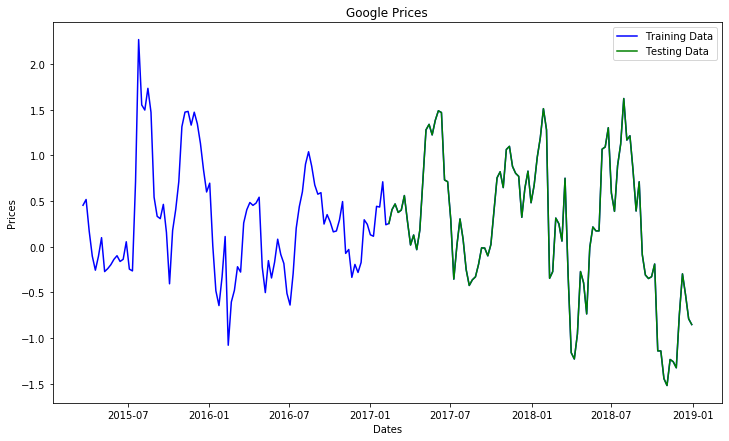

In [16]:
train_data, test_data = transformed_df[0:int(len(df)*0.5)], df[int(len(df)*0.5):]
plt.figure(figsize=(12,7))
plt.title('Google Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df, 'blue', label='Training Data')
plt.plot(test_data, 'green', label='Testing Data')
#plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

In [17]:
#train_data.shape
test_data.shape

(99,)

In [91]:
test_data.index

DatetimeIndex(['2017-02-12', '2017-02-19', '2017-02-26', '2017-03-05',
               '2017-03-12', '2017-03-19', '2017-03-26', '2017-04-02',
               '2017-04-09', '2017-04-16', '2017-04-23', '2017-04-30',
               '2017-05-07', '2017-05-14', '2017-05-21', '2017-05-28',
               '2017-06-04', '2017-06-11', '2017-06-18', '2017-06-25',
               '2017-07-02', '2017-07-09', '2017-07-16', '2017-07-23',
               '2017-07-30', '2017-08-06', '2017-08-13', '2017-08-20',
               '2017-08-27', '2017-09-03', '2017-09-10', '2017-09-17',
               '2017-09-24', '2017-10-01', '2017-10-08', '2017-10-15',
               '2017-10-22', '2017-10-29', '2017-11-05', '2017-11-12',
               '2017-11-19', '2017-11-26', '2017-12-03', '2017-12-10',
               '2017-12-17', '2017-12-24', '2017-12-31', '2018-01-07',
               '2018-01-14', '2018-01-21', '2018-01-28', '2018-02-04',
               '2018-02-11', '2018-02-18', '2018-02-25', '2018-03-04',
      

In [18]:
import pmdarima as pm
stepwise_fit = pm.auto_arima(train_data, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

result=stepwise_fit
print(result.summary())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=102.756, BIC=115.027, Fit time=0.489 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=131.408, BIC=136.317, Fit time=0.062 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=107.922, BIC=117.739, Fit time=0.173 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=100.858, BIC=110.676, Fit time=0.260 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=129.444, BIC=131.898, Fit time=0.019 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=131.687, BIC=139.050, Fit time=0.043 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=102.450, BIC=114.721, Fit time=0.303 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=102.427, BIC=114.698, Fit time=0.869 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=108.125, BIC=117.943, Fit time=0.185 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 

In [19]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [77]:
train_ar = train_data.values
test_ar = test_data.values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()[0]
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)



<class 'list'>
Testing Mean Squared Error: 0.158
Symmetric mean absolute percentage error: 67.831


In [78]:
#test_ar


In [80]:
#predictions[predictions['Date'] == '2017-02-12']
#predictions['2017-02-12']
predictions


[0.2388413301363432,
 0.25307808602732973,
 0.4061158877311576,
 0.46861825707562055,
 0.37509235558181736,
 0.401243477630812,
 0.5613601159621305,
 0.2775585743209893,
 0.015586870006481289,
 0.12566900476146617,
 -0.03572365023114947,
 0.17912726560629144,
 0.732703464590348,
 1.2863006011224227,
 1.3471720553574873,
 1.2309060972081094,
 1.3908914750534895,
 1.4966816868008024,
 1.4775402894779,
 0.7333048263957869,
 0.7144308067760128,
 0.3017188207350415,
 -0.36041016456563196,
 0.010609462542889823,
 0.3032824418081164,
 0.08166142712839362,
 -0.2552590404522706,
 -0.43005820814927415,
 -0.3680670015347971,
 -0.33523031019374083,
 -0.19830366701144295,
 -0.015211320010915262,
 -0.01747349860258049,
 -0.10319881645917307,
 0.021350458170734637,
 0.3952964477449063,
 0.7569517486966955,
 0.823225543516176,
 0.6491648758391694,
 1.0691162593858297,
 1.103371171119954,
 0.881866687855226,
 0.8066102314668365,
 0.7727799786136178,
 0.32158050712107117,
 0.6409348368763247,
 0.8298814

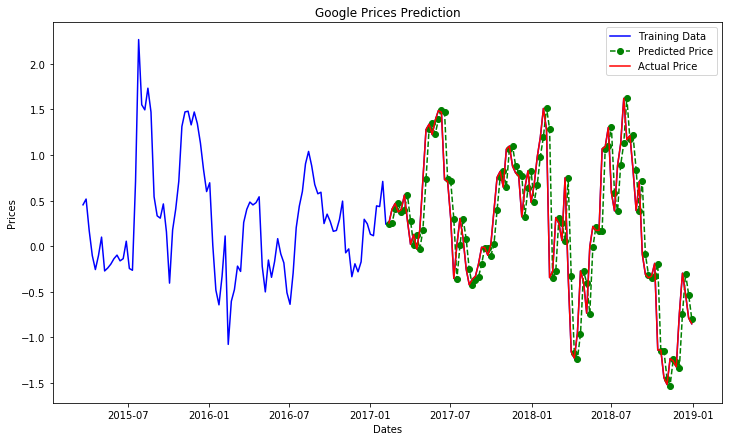

In [81]:
plt.figure(figsize=(12,7))
plt.plot(transformed_df, 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data, color='red', label='Actual Price')
plt.title('Google Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
#plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

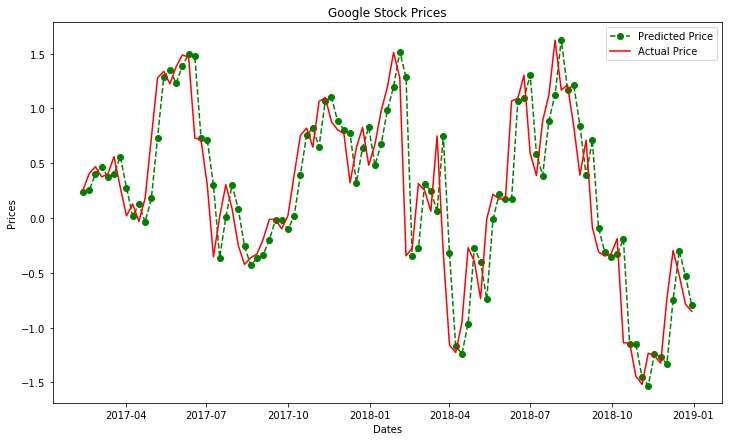

In [96]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index, test_data, color='red', label='Actual Price')
plt.legend()
plt.title('Google Stock Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
#plt.xticks(np.arange(6386,7982, 300), df['Date'][6386:7982:300])
plt.legend()

In [97]:
predictions = pd.DataFrame(predictions,index = test_data.index,columns=['Prediction'])
predictions

,Prediction
Date,
2017-02-12,0.238841
2017-02-19,0.253078
2017-02-26,0.406116
2017-03-05,0.468618
2017-03-12,0.375092
...,...
2018-12-02,-1.332871
2018-12-09,-0.743725
2018-12-16,-0.299769


## In- Sample predictions Above

## Now doing out of sample predictions

In [95]:
predict2019 = result.predict(104)
predict2019


array([0.07341249, 0.06369644, 0.15745649, 0.13640034, 0.18782502,
       0.24056585, 0.32490397, 0.3027376 , 0.25402406, 0.4151725 ,
       0.38528264, 0.27432992, 0.10789908, 0.09935578, 0.19428858,
       0.17440517, 0.22700259, 0.28091617, 0.36642703, 0.34543341,
       0.29789261, 0.4602138 , 0.43149669, 0.32171672, 0.15645862,
       0.14908806, 0.2451936 , 0.22648294, 0.28025311, 0.33533944,
       0.42202304, 0.40220217, 0.35583411, 0.51932804, 0.49178368,
       0.38317645, 0.2190911 , 0.21289329, 0.31017158, 0.29263366,
       0.34757657, 0.40383564, 0.49169199, 0.47304386, 0.42784856,
       0.59251523, 0.56614361, 0.45870913, 0.29579652, 0.29077146,
       0.38922249, 0.37285732, 0.42897298, 0.48640479, 0.57543389,
       0.5579585 , 0.51393594, 0.67977536, 0.65457649, 0.54831475,
       0.38657489, 0.38272257, 0.48234635, 0.46715392, 0.52444232,
       0.58304688, 0.67324873, 0.65694609, 0.61409627, 0.78110844,
       0.75708231, 0.65199331, 0.4914262 , 0.48874663, 0.58954

## No date provided from predict function 

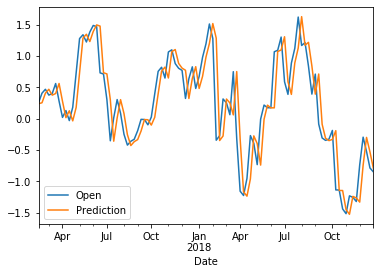

In [84]:
predictions = pd.DataFrame(predictions,index = test_data.index,columns=['Prediction'])
pd.concat([test_data,predictions],axis=1).plot()